### Импорт
В этом проекте мы будем использовать стандартные библиотеки науки о данных и машинного обучения.

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
from sklearn.preprocessing import MinMaxScaler

from sklearn.impute import SimpleImputer


# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### Считывание данных
Сначала давайте прочитаем отформатированные данные из предыдущей записной книжки.

In [2]:
train_features = pd.read_csv('data/features_train.csv')
test_features = pd.read_csv('data/features_test.csv')
target = pd.read_csv('data/target.csv')


# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training target Size:  ', target.shape)


Training Feature Size:  (1460, 71)
Testing Feature Size:   (1459, 71)
Training target Size:   (1460, 1)


In [3]:
#train_features = train_features.drop(['SalePrice'], axis = 1)
#test_features = test_features.drop(['SalePrice'], axis = 1)

In [4]:
test_features.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,Functional,...,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,2,1,1,3,3,0,4,0,1,2,0,2,1,1,12,13,3,3,4,1,4,4,3,5,3,1,4,1,4,6,...,0.000000,0.255591,0.048246,0.444444,0.625,0.644928,0.183333,0.0000,0.082920,0.097693,0.115582,0.144354,0.128958,0.000000,0.0,0.0,0.250,0.333333,0.000000,0.975622,0.514810,0.163361,0.000000,0.0,0.0,0.25,0.0,0.000000,0.454545,1.0
1,3,1,1,0,3,0,0,0,2,2,0,2,3,1,13,14,1,3,4,1,4,4,3,0,6,1,4,1,4,6,...,0.000000,0.258786,0.060609,0.555556,0.625,0.623188,0.133333,0.0675,0.163536,0.000000,0.173801,0.217512,0.228316,0.000000,0.0,0.0,0.375,0.333333,0.000000,0.974129,0.220028,0.458576,0.065814,0.0,0.0,0.00,0.0,0.806452,0.454545,1.0
2,3,1,1,0,3,0,4,0,2,2,0,5,1,1,12,13,3,3,4,2,2,4,3,2,6,1,2,1,4,6,...,0.235294,0.236422,0.058566,0.444444,0.500,0.905797,0.800000,0.0000,0.140149,0.000000,0.058647,0.151882,0.136301,0.339467,0.0,0.0,0.375,0.333333,0.333333,0.993532,0.339915,0.247375,0.062157,0.0,0.0,0.00,0.0,0.000000,0.181818,1.0
3,3,1,1,0,3,0,4,0,2,2,0,5,1,1,12,13,1,3,4,2,4,4,3,2,6,1,0,1,4,6,...,0.235294,0.249201,0.040562,0.555556,0.625,0.913043,0.800000,0.0125,0.106662,0.000000,0.138699,0.151555,0.135842,0.328329,0.0,0.0,0.375,0.333333,0.333333,0.994030,0.331453,0.420070,0.065814,0.0,0.0,0.00,0.0,0.000000,0.454545,1.0
4,3,1,1,0,1,0,4,0,2,2,4,2,1,1,6,6,3,2,4,2,2,4,3,0,6,1,0,1,4,6,...,0.588235,0.137380,0.017318,0.777778,0.500,0.869565,0.700000,0.0000,0.046598,0.000000,0.435360,0.209493,0.217072,0.000000,0.0,0.0,0.250,0.333333,0.000000,0.991045,0.356841,0.000000,0.149909,0.0,0.0,0.30,0.0,0.000000,0.000000,1.0


In [5]:
target.tail()

,SalePrice
1455,175000
1456,210000
1457,266500
1458,142125
1459,147500


In [6]:
dataset_features =  pd.concat(objs=[train_features, test_features], axis=0).reset_index(drop=True)

In [7]:
# функция поиска недостающих данных
def find_missing_data(data):
    Total = data.isnull().sum().sort_values(ascending = False)
    Percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
    
    return pd.concat([Total, Percentage] , axis = 1 , keys = ['Total' , 'Percent'])

In [8]:
find_missing_data(dataset_features).head(10)

,Total,Percent
MSZoning,0,0.0
OverallCond,0,0.0
BsmtUnfSF,0,0.0
BsmtFinSF2,0,0.0
BsmtFinSF1,0,0.0
MasVnrArea,0,0.0
YearRemodAdd,0,0.0
YearBuilt,0,0.0
OverallQual,0,0.0
1stFlrSF,0,0.0


In [9]:
from sklearn.model_selection import train_test_split

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(train_features, target, test_size = 0.3, random_state = 42)

In [10]:
# Convert y to one-dimensional array (vector) Преобразовать y в одномерный массив (вектор)
y = np.array(y).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

##  Models to Evaluate

In [11]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [12]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 21607.0228


In [13]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 55189.2345


In [14]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 18883.1492


In [15]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 17719.8645


In [16]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 34138.0865


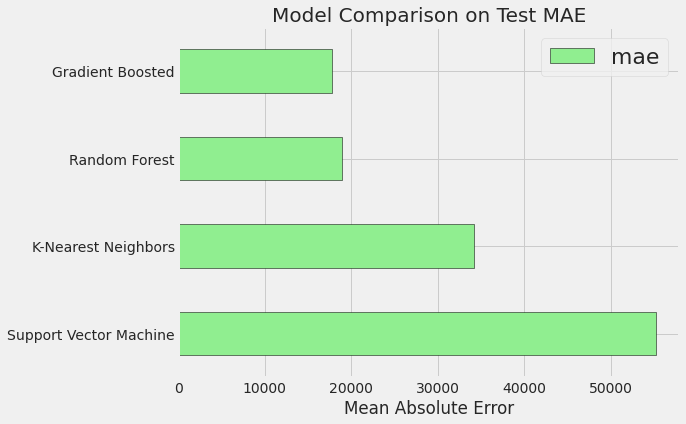

In [17]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [ svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'lightgreen', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

### Hyperparameter Tuning with Random Search and Cross Validation

In [18]:
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

learning_rate = [0.001, 0.01, 0.05, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4]

# Maximum depth of each tree
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Minimum number of samples per leaf
min_samples_leaf = [2, 3, 4, 5, 6, 7, 8,]

# Minimum number of samples to split a node
min_samples_split = [2, 3, 4, 5, 6, 7, 8,]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'learning_rate' : learning_rate,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [21]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=100, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [22]:
random_cv.fit(X, y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.05,
                                                          0.01, 0.05, 0.1, 0.2,
                                                          0.3, 0.4],
                                        'loss': ['ls', 'lad', 'huber'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8],
         

In [23]:
random_cv.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=4,
                          n_estimators=1500, random_state=42)

In [25]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000]}

model = GradientBoostingRegressor(loss = 'huber', max_depth = 4,
                                  learning_rate=0.01,
                                  min_samples_leaf = 4,
                                  #min_samples_split = 7,
                                  max_features = 'sqrt',
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [26]:
grid_search.fit(X, y)

Fitting 4 folds for each of 38 candidates, totalling 152 fits


GridSearchCV(cv=4,
             estimator=GradientBoostingRegressor(learning_rate=0.01,
                                                 loss='huber', max_depth=4,
                                                 max_features='sqrt',
                                                 min_samples_leaf=4,
                                                 random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600, 650, 700, 750,
                                          800, 850, 900, 1000, 1100, 1200, 1300,
                                          1400, 1500, 1600, 1700, 1800, 1900,
                                          2000, 2100, 2200, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [27]:
grid_search.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=4,
                          n_estimators=3000, random_state=42)

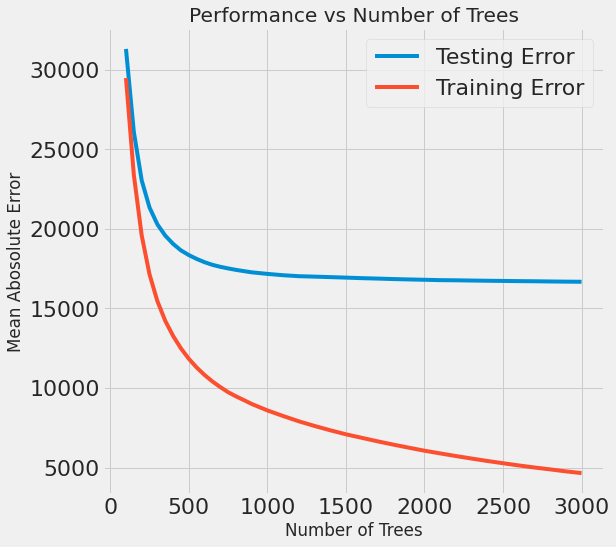

In [28]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [29]:
ID = pd.read_csv('data/test.csv')
ID = ID.Id
ID

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [30]:
Predictive_Model = pd.DataFrame({
        "Id": ID,
        "SAlePrice": grid_search.predict(test_features)})

Predictive_Model.to_csv('number_11.csv', index=False)